In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('air_pollution.csv')

In [4]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
df.shape

(5000, 10)

In [7]:
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [8]:
df.rename(columns = {'Air Quality' : 'Air_Quality'},inplace=True)

In [9]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [10]:
df_A = df.copy()

In [11]:
df_A.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
air_quality_mapping = {"Good": 0,"Moderate": 1,"Poor": 2,"Hazardous": 3}
df_A["Air_Quality"] = df["Air_Quality"].map(air_quality_mapping)

Good : 0,Moderate : 1,Poor : 2,Hazardous : 3

In [14]:
df_A.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,1
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,1
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,1
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [15]:
df_A['Air_Quality'].value_counts()

Air_Quality
0    2000
1    1500
2    1000
3     500
Name: count, dtype: int64

<Axes: xlabel='Temperature', ylabel='Humidity'>

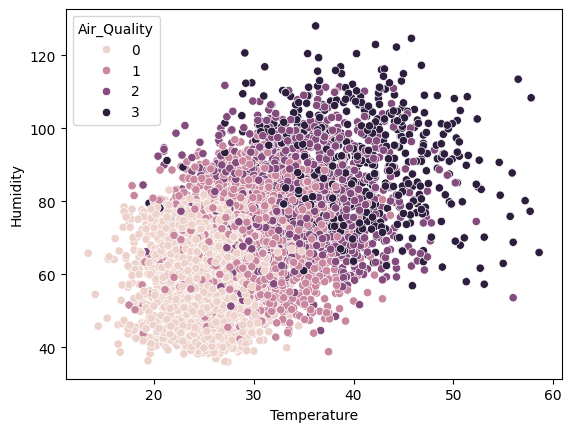

In [16]:
sns.scatterplot(data=df_A,x='Temperature',y='Humidity',hue='Air_Quality')

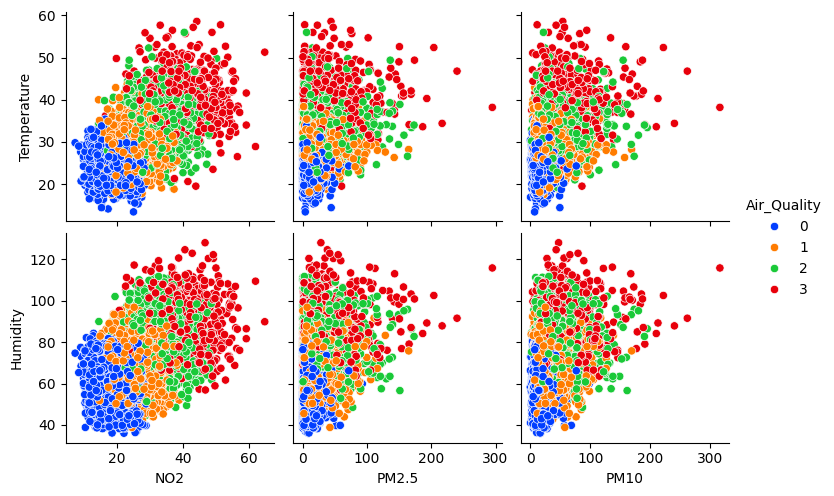

In [17]:
sns.pairplot(data=df_A,x_vars = ['NO2','PM2.5','PM10'],y_vars=['Temperature','Humidity'],hue ='Air_Quality',palette='bright')

In [18]:
X = df_A.drop('Air_Quality',axis =1)
y = df_A['Air_Quality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

In [20]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [22]:
model = LogisticRegression(multi_class = 'multinomial',solver ='lbfgs',n_jobs=-1)

In [23]:
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [24]:
y_pred = model.predict(X_test_scaled)

In [25]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.947


In [26]:
lr_scores = cross_val_score(model,X,y,cv=cv,scoring="f1_macro")

In [27]:
print("Logistic Regression CV scores:", lr_scores)

Logistic Regression CV scores: [0.64095281 0.64588074 0.66494396 0.66607965 0.65027269]


In [28]:
print("Logistic Regression Mean CV score:", lr_scores.mean())

Logistic Regression Mean CV score: 0.6536259711445199


In [29]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[409   0   0   0]
 [  0 282  12   0]
 [  0  13 165   8]
 [  0   0  20  91]]


# KNeighbours

In [30]:
model_knn = KNeighborsClassifier(n_neighbors = 5,weights="distance")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [31]:
print(accuracy_score(y_test,y_pred))

0.947


# Decision Tree

In [32]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=10, random_state=42)

In [33]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
y_pred_dt = dt.predict(X_test)


In [35]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.931


In [36]:
print(confusion_matrix(y_test, y_pred_dt))


[[408   1   0   0]
 [  3 278  13   0]
 [  0   9 156  21]
 [  0   0  22  89]]


Cross Validation

In [37]:
dt_scores = cross_val_score(dt,X,y,cv=cv, scoring="f1_macro")

In [38]:
print("CV scores:", dt_scores)

CV scores: [0.86816622 0.88463125 0.90313332 0.89275455 0.89080626]


In [39]:
print(" Mean CV score:", dt_scores.mean())

 Mean CV score: 0.8878983211222238


# Random Forest (Ensemble Technique)

In [40]:
rf = RandomForestClassifier(n_estimators=300,min_samples_split=5,min_samples_leaf=2,class_weight="balanced",random_state=42,n_jobs=-1)

In [41]:
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_pred_rf = rf.predict(X_test)

In [43]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.956


Cross validation

In [44]:
rf_scores = cross_val_score(rf,X,y,cv=cv,scoring="f1_macro")

In [45]:
print("CV scores:", rf_scores)

CV scores: [0.9143206  0.92142495 0.94556896 0.93258356 0.93199826]


In [46]:
print("Mean CV score:", rf_scores.mean())

Mean CV score: 0.9291792654692628
